<a href="https://colab.research.google.com/github/jsale017/hack_diversity_tech_dive_2024/blob/main/Final_Prediction_Model_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This second cell will be in a separate sandboxed iframe.


In [8]:
path = "/content/drive/MyDrive/hackdiversity/cleaned_diamond_data.csv"
diamond_df = pd.read_csv(path)
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
1,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
2,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
3,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
4,5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
403045,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
403046,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
403047,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [9]:
diamond_df=diamond_df.rename(columns={'cost (dollars)': 'cost_dollars',
                      'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
1,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
2,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
3,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
4,5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
403045,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
403046,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
403047,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [10]:
diamond_df = diamond_df.dropna(subset=['carat'])
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
1,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
2,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
3,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
4,5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
403045,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
403046,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
403047,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [11]:
total_nans = diamond_df.isna().sum().sum()
print(f"Total NaNs in DataFrame: {total_nans}")
# Find rows with at least one NaN value
rows_with_nans = diamond_df[diamond_df.isna().any(axis=1)]

# Display the rows with NaNs
print(rows_with_nans)

Total NaNs in DataFrame: 0
Empty DataFrame
Columns: [index, carat, cut, color, clarity, depth, table, cost_dollars, length_mm, width_mm, height_mm, year]
Index: []


In [12]:
diamond_df = diamond_df[diamond_df['cost_dollars'] != 0]
diamond_df = diamond_df[diamond_df['cost_dollars'] >= 0]
diamond_df

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
1,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
2,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
3,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
4,5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
403045,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
403046,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
403047,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [13]:
diamond_df.drop(['year','index'], axis=1, inplace=True)

# Detecting and creating a sub-dataframe for outliers

In [14]:
# Detect outliers using z-score
z_scores = (diamond_df - diamond_df.mean()) / diamond_df.std()
outliers = diamond_df[(z_scores.abs() > 3).any(axis=1)]

# Alternatively, detect outliers using IQR method
Q1 = diamond_df.quantile(0.25)
Q3 = diamond_df.quantile(0.75)
IQR = Q3 - Q1
outliers = diamond_df[((diamond_df < (Q1 - 1.5 * IQR)) | (diamond_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a sub-dataframe of outliers
outliers_df = diamond_df.loc[outliers.index]

# Print or further analyze the outliers dataframe
print(outliers_df)


<ipython-input-14-4bb6a084867e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (diamond_df - diamond_df.mean()) / diamond_df.std()
<ipython-input-14-4bb6a084867e>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (diamond_df - diamond_df.mean()) / diamond_df.std()
<ipython-input-14-4bb6a084867e>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this wa

        carat        cut color clarity  depth  table  cost_dollars  length_mm  \
0        0.23       Good     E     VS1   56.9   65.0           327       4.05   
15       0.31  Very Good     J     SI1   58.1   62.0           353       4.44   
59       0.86       Fair     E     SI2   55.1   69.0          2757       6.45   
62       0.96       Fair     F     SI2   66.3   62.0          2759       6.27   
80       0.91       Fair     H     SI2   65.7   60.0          2763       6.03   
...       ...        ...   ...     ...    ...    ...           ...        ...   
403004   1.00       Fair     I     SI2   66.8   56.0          3909       6.22   
403017   0.70       Good     D     VS2   58.0   62.0          3328       5.78   
403019   0.73       Good     E     SI1   57.9   55.0          3487       6.00   
403023   0.70       Good     F     VS1   57.8   61.0          3646       5.83   
403039   0.79       Good     F     SI1   58.1   59.0          3402       6.06   

        width_mm  height_mm

In [15]:
outliers_df

,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm
0,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
15,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
59,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
62,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
80,0.91,Fair,H,SI2,65.7,60.0,2763,6.03,5.99,3.95
...,...,...,...,...,...,...,...,...,...,...
403004,1.00,Fair,I,SI2,66.8,56.0,3909,6.22,6.12,4.13
403017,0.70,Good,D,VS2,58.0,62.0,3328,5.78,5.87,3.38
403019,0.73,Good,E,SI1,57.9,55.0,3487,6.00,5.96,3.46
403023,0.70,Good,F,VS1,57.8,61.0,3646,5.83,5.79,3.36


# Saving the dataframe without outliers

In [16]:
diamond_df_cleaned = diamond_df.drop(outliers.index)

# Save the cleaned dataframe to a CSV file
diamond_df_cleaned.to_csv('diamond_data_cleaned.csv', index=False)

In [17]:
diamond_df_cleaned

,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
5,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
...,...,...,...,...,...,...,...,...,...,...
403044,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50
403045,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61
403046,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56
403047,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74


In [20]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.1 MB/s eta 0:00:00


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error, r2_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree

Colab environment detected.


In [23]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

In [24]:
# create a list containing predictors' name
predictors = ['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']
print(predictors)

['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']


In [25]:
# define outcome/target variable
outcome = 'cost_dollars'
print(outcome)

cost_dollars


In [26]:
x = diamond_df_cleaned[predictors]
y = diamond_df_cleaned[outcome]

In [27]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
train_x.head()

,carat,cut,color,depth,table,length_mm,width_mm,height_mm,clarity
256069,0.30,Ideal,E,61.3,54.0,4.34,4.37,2.67,VVS2
94188,0.50,Good,E,63.1,61.0,5.00,5.05,3.17,VS2
161899,0.55,Ideal,F,62.7,55.0,5.24,5.26,3.29,VS2
191247,0.37,Premium,D,61.0,56.0,4.68,4.63,2.84,VS2
335084,0.70,Ideal,E,61.9,57.0,5.69,5.74,3.54,VS2


In [28]:
# pre-processing for numerical and categorical data
numerical_cols = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']
categorical_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


# Random Forest Regressor

In [29]:
# Initialize the Random Forest Regressor
RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

RFpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RFmodel)])


In [30]:
# Fit the model to the training data
RFpipeline.fit(train_x, train_y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [31]:
# Make predictions on the training set
train_y_pred_RF = RFpipeline.predict(train_x)

In [32]:
# Make predictions on the validation set
valid_y_pred_RF = RFpipeline.predict(valid_x)

In [33]:
# Evaluate the model #regression tree performance
regressionSummary(train_y, RFpipeline.predict(train_x))
regressionSummary(valid_y, RFpipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 0.2004
       Root Mean Squared Error (RMSE) : 356.9289
            Mean Absolute Error (MAE) : 226.3593
          Mean Percentage Error (MPE) : -0.6419
Mean Absolute Percentage Error (MAPE) : 6.6952

Regression statistics

                      Mean Error (ME) : 1.0013
       Root Mean Squared Error (RMSE) : 409.5145
            Mean Absolute Error (MAE) : 259.3411
          Mean Percentage Error (MPE) : -0.7345
Mean Absolute Percentage Error (MAPE) : 7.6241


In [34]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_RF)
r2 = r2_score(train_y, train_y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 127398.22631182412
R-squared: 0.9866160388082882


In [35]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_RF)
r2 = r2_score(valid_y, valid_y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 167702.11395479596
R-squared: 0.9824901228997063


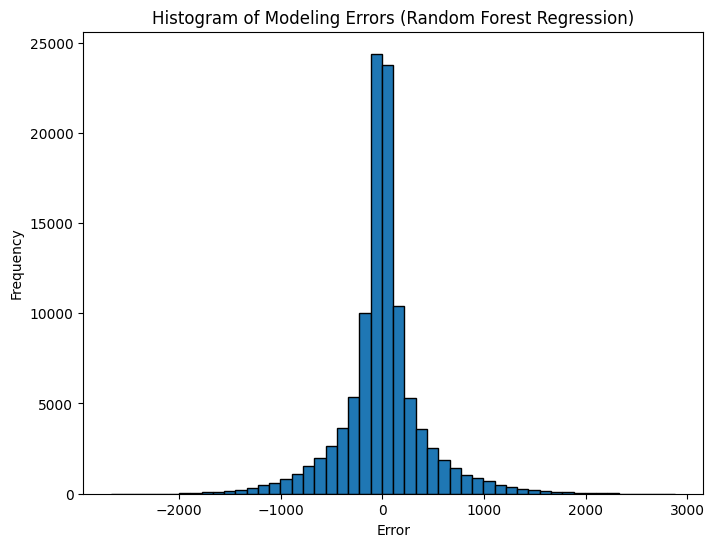

In [36]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_RF

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Random Forest Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model 2: XBGRegressor

In [37]:
#!pip install xgboost

In [38]:
from xgboost import XGBRegressor

In [39]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb_model)])

In [40]:
# Fit the model to the training data
xgb_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              ea...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [41]:
# Make predictions on the training set
train_y_pred_xgb = xgb_pipeline.predict(train_x)

In [42]:
# Make predictions on the validation set
valid_y_pred_xgb = xgb_pipeline.predict(valid_x)

In [43]:
# Evaluate the model #regression tree performance
regressionSummary(train_y, xgb_pipeline.predict(train_x))
regressionSummary(valid_y, xgb_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 0.0019
       Root Mean Squared Error (RMSE) : 505.9279
            Mean Absolute Error (MAE) : 316.5463
          Mean Percentage Error (MPE) : -1.7837
Mean Absolute Percentage Error (MAPE) : 9.9797

Regression statistics

                      Mean Error (ME) : 1.0729
       Root Mean Squared Error (RMSE) : 509.9978
            Mean Absolute Error (MAE) : 319.0052
          Mean Percentage Error (MPE) : -1.8243
Mean Absolute Percentage Error (MAPE) : 10.0169


In [44]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_xgb)
r2 = r2_score(train_y, train_y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 255963.03019298587
R-squared: 0.973109521523237


In [45]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_xgb)
r2 = r2_score(valid_y, valid_y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 260097.73203794003
R-squared: 0.9728430416608996


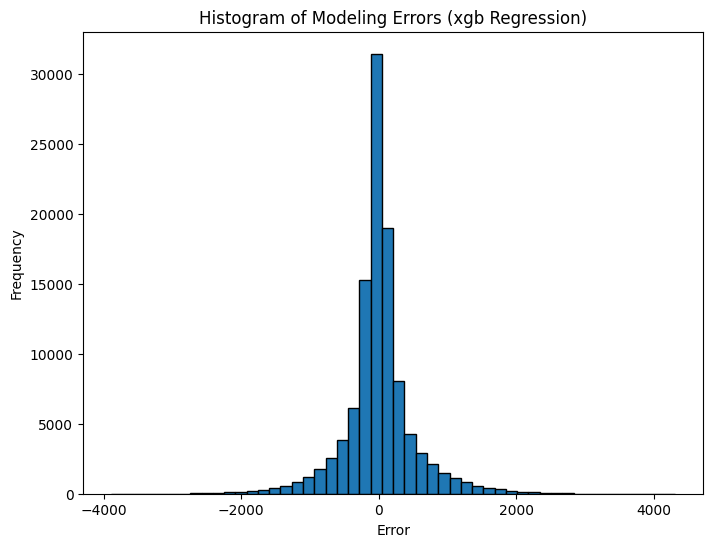

In [46]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_xgb

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (xgb Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model 3: LightGBMRegressor

In [47]:
#!pip install lightgbm
from lightgbm import LGBMRegressor

# new model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# new pipeline
lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', lgbm_model)])

In [48]:
# Fit the model to the training data
lgbm_pipeline.fit(train_x, train_y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 249001, number of used features: 26
[LightGBM] [Info] Start training from score 3469.133405


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', LGBMRegressor(random_state=42))])

In [49]:
# Make predictions on the training set
train_y_pred_lgbm = lgbm_pipeline.predict(train_x)

In [50]:
# Make predictions on the validation set
valid_y_pred_lgbm = lgbm_pipeline.predict(valid_x)

In [51]:
# Evaluate the model #regression performance
regressionSummary(train_y, lgbm_pipeline.predict(train_x))
regressionSummary(valid_y, lgbm_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 504.2357
            Mean Absolute Error (MAE) : 318.1695
          Mean Percentage Error (MPE) : -1.9641
Mean Absolute Percentage Error (MAPE) : 10.2320

Regression statistics

                      Mean Error (ME) : 1.3063
       Root Mean Squared Error (RMSE) : 506.3885
            Mean Absolute Error (MAE) : 319.2650
          Mean Percentage Error (MPE) : -2.0064
Mean Absolute Percentage Error (MAPE) : 10.2487


In [52]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_lgbm)
r2 = r2_score(train_y, train_y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 254253.68082379733
R-squared: 0.9732890991067137


In [53]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_lgbm)
r2 = r2_score(valid_y, valid_y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 256429.3012794514
R-squared: 0.9732260646903493


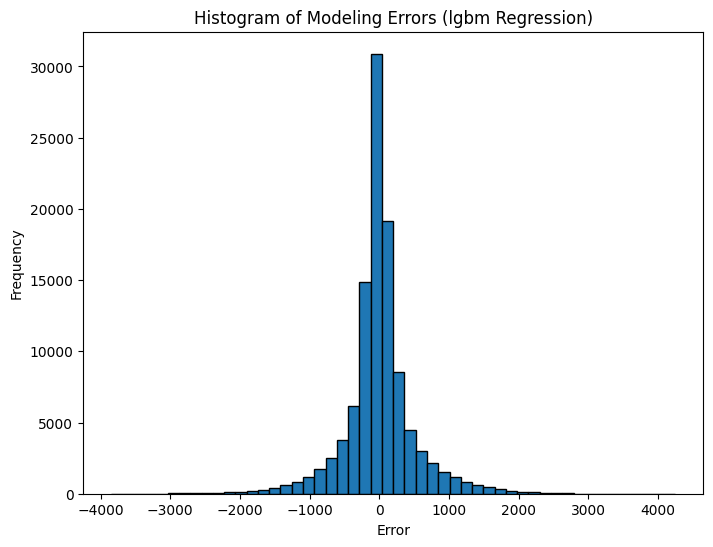

In [54]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_lgbm

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (lgbm Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model 4: KNN

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune this parameter

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                               ('scaler', StandardScaler()),    # Standardize features
                               ('model', knn_model)])

In [57]:
# Fit the model to the training data
knn_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [58]:
# Make predictions on the training set
train_y_pred_knn = knn_pipeline.predict(train_x)

In [59]:
# Make predictions on the validation set
valid_y_pred_knn = knn_pipeline.predict(valid_x)

In [60]:
# Evaluate the model #regression performance
regressionSummary(train_y, knn_pipeline.predict(train_x))
regressionSummary(valid_y, knn_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 1.0826
       Root Mean Squared Error (RMSE) : 375.4193
            Mean Absolute Error (MAE) : 235.0273
          Mean Percentage Error (MPE) : -0.6346
Mean Absolute Percentage Error (MAPE) : 6.9323

Regression statistics

                      Mean Error (ME) : 2.9999
       Root Mean Squared Error (RMSE) : 427.0203
            Mean Absolute Error (MAE) : 267.4367
          Mean Percentage Error (MPE) : -0.7275
Mean Absolute Percentage Error (MAPE) : 7.8233


In [61]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_knn)
r2 = r2_score(train_y, train_y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 140939.6305671062
R-squared: 0.9851934316474131


In [62]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_knn)
r2 = r2_score(valid_y, valid_y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 182346.37122991148
R-squared: 0.9809611073192499


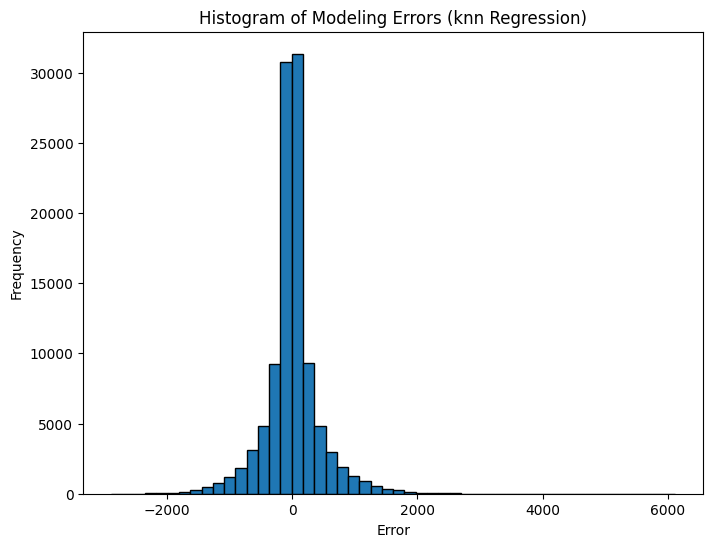

In [63]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_knn

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (knn Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Model 5: Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
#Initialise the model
linear_model = LinearRegression()

linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                                  ('scaler', StandardScaler()),    # Standardize features
                                  ('model', linear_model)])


In [66]:
# Fit the model to the training data
linear_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [67]:
# Make predictions on the training set
train_y_pred_LR = linear_pipeline.predict(train_x)

In [68]:
# Make predictions on the validation set
valid_y_pred_LR = linear_pipeline.predict(valid_x)

In [69]:
# Evaluate the model #regression performance
regressionSummary(train_y, linear_pipeline.predict(train_x))
regressionSummary(valid_y, linear_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -0.0402
       Root Mean Squared Error (RMSE) : 892.7711
            Mean Absolute Error (MAE) : 617.4790
          Mean Percentage Error (MPE) : 3.7853
Mean Absolute Percentage Error (MAPE) : 31.8525

Regression statistics

                      Mean Error (ME) : -1.5831
       Root Mean Squared Error (RMSE) : 887.5836
            Mean Absolute Error (MAE) : 616.5734
          Mean Percentage Error (MPE) : 3.6504
Mean Absolute Percentage Error (MAPE) : 31.9915


In [70]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_LR)
r2 = r2_score(train_y, train_y_pred_LR)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 797040.1873558052
R-squared: 0.9162660639427226


In [71]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_LR)
r2 = r2_score(valid_y, valid_y_pred_LR)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 787804.639276406
R-squared: 0.9177448507507225


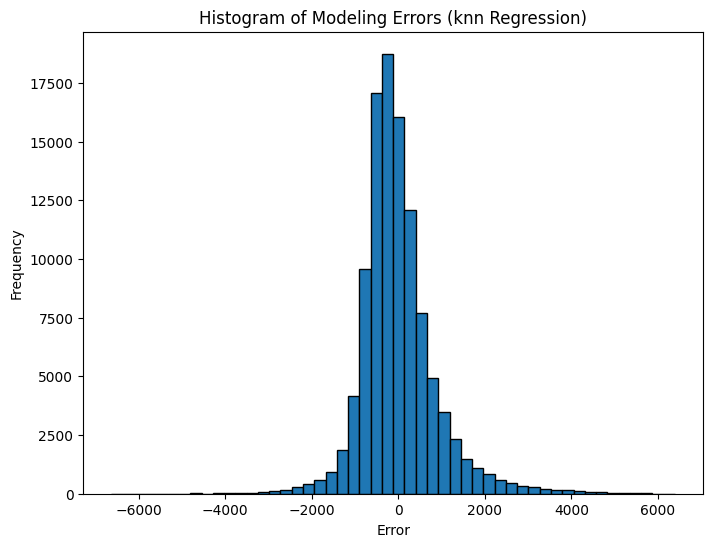

In [72]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_LR

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (knn Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [73]:
#Linear regression model of price vs. diamond attributes using Statmodels
# run a linear regression of Price on the remaining predictors in the training set
train_df = train_x.join(train_y)
print(train_df.head())

        carat      cut color  depth  table  length_mm  width_mm  height_mm  \
256069   0.30    Ideal     E   61.3   54.0       4.34      4.37       2.67   
94188    0.50     Good     E   63.1   61.0       5.00      5.05       3.17   
161899   0.55    Ideal     F   62.7   55.0       5.24      5.26       3.29   
191247   0.37  Premium     D   61.0   56.0       4.68      4.63       2.84   
335084   0.70    Ideal     E   61.9   57.0       5.69      5.74       3.54   

       clarity  cost_dollars  
256069    VVS2           963  
94188      VS2          1428  
161899     VS2          1838  
191247     VS2          1128  
335084     VS2          3136  


In [74]:
# create the linear model formula
#string_name.join(iterable); returns a string concatenated with the elements of iterable
formula = 'cost_dollars ~ ' + ' + '.join(predictors)
formula

'cost_dollars ~ carat + cut + color + depth + table + length_mm + width_mm + height_mm + clarity'

In [75]:
import statsmodels.formula.api as sm

In [76]:
# build the linear model
linear_pipeline = sm.ols(formula=formula, data=train_df).fit()
linear_pipeline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           cost_dollars   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 1.185e+05
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:56:30   Log-Likelihood:            -2.0451e+06
No. Observations:              249001   AIC:                         4.090e+06
Df Residuals:                  248977   BIC:                         4.091e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -398.6958    301.012     -1.325      0.185    -988.671     191.279
cut[T.Good]        215.9999     22.482      9.608      0.000     171.936     260.064
cut[T.Ideal]       399.0101     22.305     17.889      0.000     355.294     442.727
cut[T.Premium]     356.1044     22.169     16.063      0.000     312.654     399.555
cut[T.Very Good]   290.4383     22.192     13.088      0.000     246.943     333.934
color[T.E]        -179.9966      6.472    -27.812      0.000    -192.682    -167.312
color[T.F]        -241.0165      6.604    -36.493      0.000    -253.961    -228.072
color[T.G]        -389.2675      6.422    -60.612      0.000    -401.855    -376.680
color[T.H]        -800.7393      6.868   -116.582      0.000    -814.201    -787.277
color[T.I]       -1274.0249      7.842   -162.465      0.000   -1289.395   -1258.655
color[T.J]       -2005.4493      9.935   -201.858      0.000   -2024.922   -1985.977
clarity[T.IF]     4058.5731     20.908    194.113      0.000    4017.593    4099.553
clarity[T.SI1]    2739.7989     18.544    147.750      0.000    2703.454    2776.144
clarity[T.SI2]    1920.4321     18.662    102.906      0.000    1883.855    1957.009
clarity[T.VS1]    3555.3107     18.826    188.849      0.000    3518.412    3592.210
clarity[T.VS2]    3250.8967     18.606    174.727      0.000    3214.430    3287.363
clarity[T.VVS1]   3885.2269     19.549    198.745      0.000    3846.912    3923.542
clarity[T.VVS2]   3922.1811     19.223    204.039      0.000    3884.505    3959.857
carat              1.21e+04     31.155    388.538      0.000     1.2e+04    1.22e+04
depth               16.4655      4.375      3.763      0.000       7.890      25.041
table              -24.9824      1.171    -21.333      0.000     -27.278     -22.687
length_mm        -1502.7905     43.908    -34.226      0.000   -1588.849   -1416.732
width_mm          1150.7312     44.597     25.803      0.000    1063.323    1238.140
height_mm        -1538.7102     67.988    -22.632      0.000   -1671.964   -1405.456
==============================================================================
Omnibus:                    68858.215   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           379757.555
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       8.533   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Decision Tree Regressor

In [77]:
decision_tree_model = DecisionTreeRegressor()

decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('scaler', StandardScaler()),    # Standardize features if necessary
    ('model', decision_tree_model)
])

In [78]:
# Fit the model to the training data
decision_tree_pipeline.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [79]:
# Make predictions on the training set
train_y_pred_DT = decision_tree_pipeline.predict(train_x)

In [80]:
# Make predictions on the validation set
valid_y_pred_DT = decision_tree_pipeline.predict(valid_x)

In [81]:
# Evaluate the model #regression performance
regressionSummary(train_y, decision_tree_pipeline.predict(train_x))
regressionSummary(valid_y, decision_tree_pipeline.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 356.5914
            Mean Absolute Error (MAE) : 226.0795
          Mean Percentage Error (MPE) : -0.6424
Mean Absolute Percentage Error (MAPE) : 6.6902

Regression statistics

                      Mean Error (ME) : 0.6035
       Root Mean Squared Error (RMSE) : 409.8221
            Mean Absolute Error (MAE) : 259.3698
          Mean Percentage Error (MPE) : -0.7344
Mean Absolute Percentage Error (MAPE) : 7.6238


In [82]:
#Calculate mean squared error, training
mse = mean_squared_error(train_y, train_y_pred_DT)
r2 = r2_score(train_y, train_y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 127157.4581929135
R-squared: 0.9866413329685995


In [83]:
#Calculate mean squared error, validation
mse = mean_squared_error(valid_y, valid_y_pred_DT)
r2 = r2_score(valid_y, valid_y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 167954.13374777892
R-squared: 0.982463809363771


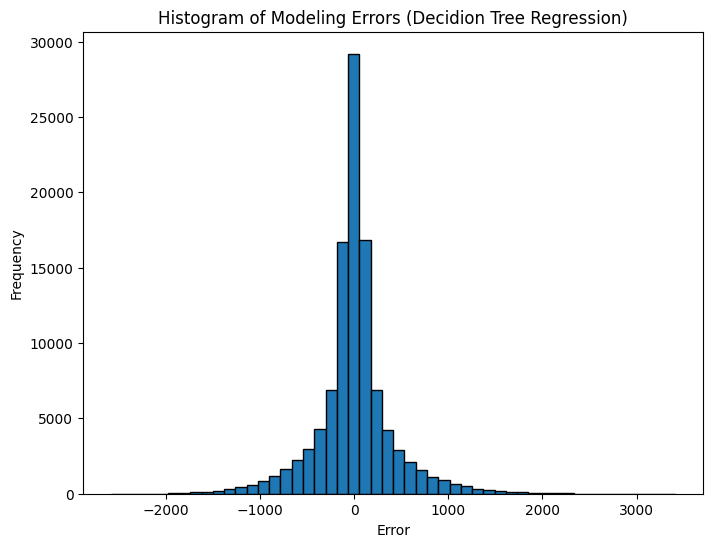

In [84]:
# Calculate modeling errors
errors = valid_y - valid_y_pred_DT

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Decidion Tree Regression)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Prediction on new data

In [85]:
new_path = "/content/drive/MyDrive/hackdiversity/cleaned_diamond_data.csv"

df2024 = pd.read_csv(new_path)
df2024

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
1,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
2,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
3,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
4,5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
403045,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
403046,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
403047,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [86]:
df2024 = df2024.rename(columns={'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
df2024

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
1,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
2,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
3,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
4,5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
403045,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
403046,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
403047,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [87]:
# Use the trained Random Forest pipeline to predict prices on the new dataset
RFpredicted_prices = RFpipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_RF'] = RFpredicted_prices


In [88]:
# Use the trained xgb pipeline to predict prices on the new dataset
XGBpredicted_prices = xgb_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_XGB'] = XGBpredicted_prices


In [89]:
# Use the trained xgb pipeline to predict prices on the new dataset
lgbmpredicted_prices = lgbm_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_LGBM'] = lgbmpredicted_prices


In [90]:
# Use the trained knn pipeline to predict prices on the new dataset
knnpredicted_prices = knn_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_KNN'] = knnpredicted_prices

In [91]:
# Use the trained pipeline to predict prices on the new dataset
linearpredicted_prices = linear_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_Lin'] = linearpredicted_prices

In [92]:
# Use the trained pipeline to predict prices on the new dataset
DecisionTreepredicted_prices = decision_tree_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_DT'] = DecisionTreepredicted_prices

# Ensemble Learning

In [93]:
# Average predicted cost
df2024['pred_cost_avg'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN', 'pred_cost_DT']].mean(axis=1)
# Cost range (max - min)
df2024['pred_cost_range_min'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN', 'pred_cost_DT']].min(axis=1)
df2024['pred_cost_range_max'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN', 'pred_cost_DT']].max(axis=1)

df2024

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,...,year,pred_cost_RF,pred_cost_XGB,pred_cost_LGBM,pred_cost_KNN,pred_cost_Lin,pred_cost_DT,pred_cost_avg,pred_cost_range_min,pred_cost_range_max
0,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,...,2012,468.308635,514.458984,520.224749,667.2,332.529717,418.750000,517.788474,418.750000,667.200000
1,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,...,2012,382.887216,403.057129,494.417935,386.6,-467.764995,383.888889,410.170234,382.887216,494.417935
2,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,...,2012,385.565222,375.592987,390.668805,400.0,-2669.789495,386.222222,387.609847,375.592987,400.000000
3,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,...,2012,381.578892,356.016022,393.562339,374.4,-856.413490,382.666667,377.644784,356.016022,393.562339
4,5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,...,2012,390.988998,436.476166,503.348133,383.8,-146.802125,391.375000,421.197660,383.800000,503.348133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,...,2023,3011.796098,3244.632568,3185.258046,3017.0,3634.434162,3003.500000,3092.437343,3003.500000,3244.632568
403045,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,...,2023,3150.209968,3128.606689,3150.228149,3202.0,3448.661383,3151.428571,3156.494675,3128.606689,3202.000000
403046,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,...,2023,3104.544425,3044.596924,3011.686213,3292.6,3192.617848,3084.727273,3107.630967,3011.686213,3292.600000
403047,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,...,2023,3254.302882,2885.041260,3145.410458,3308.2,3088.277595,3240.875000,3166.765920,2885.041260,3308.200000


In [94]:
#What will be the total sales in 2024?
pd.set_option('display.float_format', lambda x: '%.2f' % x)
total_sales_RF = df2024['pred_cost_RF'].sum()
total_sales_XGB = df2024['pred_cost_XGB'].sum()
total_sales_LGBM = df2024['pred_cost_LGBM'].sum()
total_sales_KNN = df2024['pred_cost_KNN'].sum()
total_sales_LinReg = df2024['pred_cost_Lin'].sum()
total_sales_DT = df2024['pred_cost_DT'].sum()


print(f'Total sales_RF: {total_sales_RF}')
print(f'Total sales_XGB: {total_sales_XGB}')
print(f'Total sales_LGBM: {total_sales_LGBM}')
print(f'Total sales_KNN: {total_sales_KNN}')
print(f'Total sales_LinReg: {total_sales_LinReg}')
print(f'Total sales_DT: {total_sales_DT}')

Total sales_RF: 1658793896.7581794
Total sales_XGB: 1651359488.0
Total sales_LGBM: 1651424520.8823276
Total sales_KNN: 1631894538.7999995
Total sales_LinReg: 1704832783.3896074
Total sales_DT: 1658821972.033105


In [95]:
#What is the average predicted diamond sale in 2024?
average_price_RF = df2024['pred_cost_RF'].mean()
average_price_XGB = df2024['pred_cost_XGB'].mean()
average_price_LGBM = df2024['pred_cost_LGBM'].mean()
average_price_KNN = df2024['pred_cost_KNN'].mean()
average_price_LinReg = df2024['pred_cost_Lin'].mean()
average_price_DT = df2024['pred_cost_DT'].mean()

print(f"RF_Average predicted diamond sale price in 2024: {average_price_RF}")
print(f"XGB_Average predicted diamond sale price in 2024: {average_price_XGB}")
print(f"LGBM_Average predicted diamond sale price in 2024: {average_price_LGBM}")
print(f"KNN_Average predicted diamond sale price in 2024: {average_price_KNN}")
print(f"LinReg_Average predicted diamond sale price in 2024: {average_price_LinReg}")
print(f"DT_Average predicted diamond sale price in 2024: {average_price_DT}")

RF_Average predicted diamond sale price in 2024: 4115.613478158188
XGB_Average predicted diamond sale price in 2024: 4097.16796875
LGBM_Average predicted diamond sale price in 2024: 4097.329408787337
KNN_Average predicted diamond sale price in 2024: 4048.8738064106337
LinReg_Average predicted diamond sale price in 2024: 4229.840003050764
DT_Average predicted diamond sale price in 2024: 4115.683135383303


In [96]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Set display options to suppress scientific notation
total_sales_per_cut = df2024.groupby('cut')[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN', 'pred_cost_Lin', 'pred_cost_DT']].sum()
print(total_sales_per_cut)

           pred_cost_RF  pred_cost_XGB  pred_cost_LGBM  pred_cost_KNN  \
cut                                                                     
Fair        55392936.52    54620484.00     54353029.39    52992767.80   
Good       152953304.41   153014064.00    152747426.56   147526372.00   
Ideal      584165522.39   580988160.00    582010581.51   577274545.00   
Premium    485740232.39   483275584.00    482905621.46   478955820.80   
Very Good  380541901.06   379461120.00    379407861.96   375145033.20   

           pred_cost_Lin  pred_cost_DT  
cut                                     
Fair         60984956.77   54891331.29  
Good        158131312.38  152505506.32  
Ideal       591683449.49  583493606.50  
Premium     504975855.79  486787298.81  
Very Good   389057208.95  381144229.11  


# save predicted prices dataframe to csv

In [97]:
#drop the index column
df2024 = df2024.drop(df2024.columns[0], axis=1)
df2024

,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year,pred_cost_RF,pred_cost_XGB,pred_cost_LGBM,pred_cost_KNN,pred_cost_Lin,pred_cost_DT,pred_cost_avg,pred_cost_range_min,pred_cost_range_max
0,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,2012,468.31,514.46,520.22,667.20,332.53,418.75,517.79,418.75,667.20
1,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63,2012,382.89,403.06,494.42,386.60,-467.76,383.89,410.17,382.89,494.42
2,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75,2012,385.57,375.59,390.67,400.00,-2669.79,386.22,387.61,375.59,400.00
3,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48,2012,381.58,356.02,393.56,374.40,-856.41,382.67,377.64,356.02,393.56
4,0.24,Very Good,I,VVS1,62.30,57.00,336,3.95,3.98,2.47,2012,390.99,436.48,503.35,383.80,-146.80,391.38,421.20,383.80,503.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403044,0.72,Ideal,D,SI1,60.80,57.00,3394,5.75,5.76,3.50,2023,3011.80,3244.63,3185.26,3017.00,3634.43,3003.50,3092.44,3003.50,3244.63
403045,0.72,Good,D,SI1,63.10,55.00,3256,5.69,5.75,3.61,2023,3150.21,3128.61,3150.23,3202.00,3448.66,3151.43,3156.49,3128.61,3202.00
403046,0.70,Very Good,D,SI1,62.80,60.00,3569,5.66,5.68,3.56,2023,3104.54,3044.60,3011.69,3292.60,3192.62,3084.73,3107.63,3011.69,3292.60
403047,0.86,Premium,H,SI2,61.00,58.00,4022,6.15,6.12,3.74,2023,3254.30,2885.04,3145.41,3308.20,3088.28,3240.88,3166.77,2885.04,3308.20


In [98]:
df2024.to_csv('price_prediction_2024.csv', index=False)

# Training model on outlier data

In [99]:
# create a list containing predictors' name
predictors = ['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']
print(predictors)

['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity']


In [100]:
# define outcome/target variable
outcome = 'cost_dollars'
print(outcome)

cost_dollars


In [101]:
X = outliers_df[predictors]
Y = outliers_df[outcome]

In [102]:
Train_X, test_X, Train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=1)
Train_X.head()

,carat,cut,color,depth,table,length_mm,width_mm,height_mm,clarity
114551,1.50,Fair,D,65.10,59.00,7.10,7.01,4.59,SI1
279822,1.24,Fair,D,55.60,67.00,7.27,7.11,4.00,SI1
317234,1.54,Premium,G,61.60,59.00,7.46,7.40,4.58,VS2
16474,1.75,Premium,G,62.80,59.00,7.62,7.53,4.76,VS2
101502,1.01,Fair,G,67.10,59.00,6.27,6.19,4.18,SI2


In [103]:
# pre-processing for numerical and categorical data
numerical_cols = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm']
categorical_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


# Random Forest Regressor #outliers data

In [104]:
# Initialize the Random Forest Regressor
Outlier_RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

Outlier_RFpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Outlier_RFmodel)])


In [105]:
# Fit the model to the training data
Outlier_RFpipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [106]:
# Make predictions on the training set
Train_Y_pred_RF = Outlier_RFpipeline.predict(Train_X)

In [107]:
# Make predictions on the validation set
test_Y_pred_RF = Outlier_RFpipeline.predict(test_X)

In [108]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_RFpipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_RFpipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : -1.8099
       Root Mean Squared Error (RMSE) : 1012.9464
            Mean Absolute Error (MAE) : 710.3791
          Mean Percentage Error (MPE) : -0.6156
Mean Absolute Percentage Error (MAPE) : 6.3876

Regression statistics

                      Mean Error (ME) : -16.0788
       Root Mean Squared Error (RMSE) : 1169.0091
            Mean Absolute Error (MAE) : 825.6839
          Mean Percentage Error (MPE) : -0.8404
Mean Absolute Percentage Error (MAPE) : 7.3727


In [109]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_RF)
r2 = r2_score(Train_Y, Train_Y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1026060.4136510054
R-squared: 0.9777166964793281


In [110]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_RF)
r2 = r2_score(test_Y, test_Y_pred_RF)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1366582.1700109767
R-squared: 0.9702252356025621


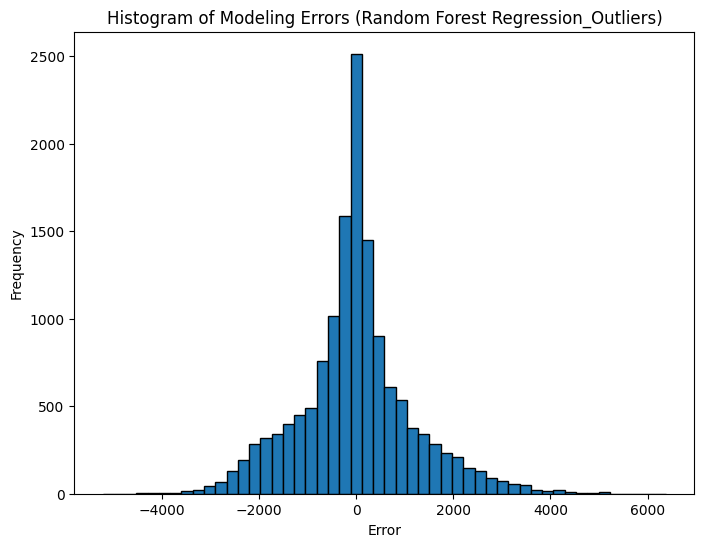

In [111]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_RF

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Random Forest Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# xgb Regressor_outlier diamonds

In [112]:
Outlier_xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

Outlier_xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', Outlier_xgb_model)])

In [113]:
# Fit the model to the training data
Outlier_xgb_pipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              ea...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [114]:
# Make predictions on the training set
Train_Y_pred_xgb = Outlier_xgb_pipeline.predict(Train_X)

In [115]:
# Make predictions on the validation set
test_Y_pred_xgb = Outlier_xgb_pipeline.predict(test_X)

In [116]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_xgb_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_xgb_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : -0.0043
       Root Mean Squared Error (RMSE) : 1341.2126
            Mean Absolute Error (MAE) : 940.1563
          Mean Percentage Error (MPE) : -1.8771
Mean Absolute Percentage Error (MAPE) : 9.3341

Regression statistics

                      Mean Error (ME) : -18.5308
       Root Mean Squared Error (RMSE) : 1393.5996
            Mean Absolute Error (MAE) : 981.3758
          Mean Percentage Error (MPE) : -2.0620
Mean Absolute Percentage Error (MAPE) : 9.6850


In [117]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_xgb)
r2 = r2_score(Train_Y, Train_Y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1798851.3438025129
R-squared: 0.9609337326055795


In [118]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_xgb)
r2 = r2_score(test_Y, test_Y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1942119.9299879526
R-squared: 0.9576855569932576


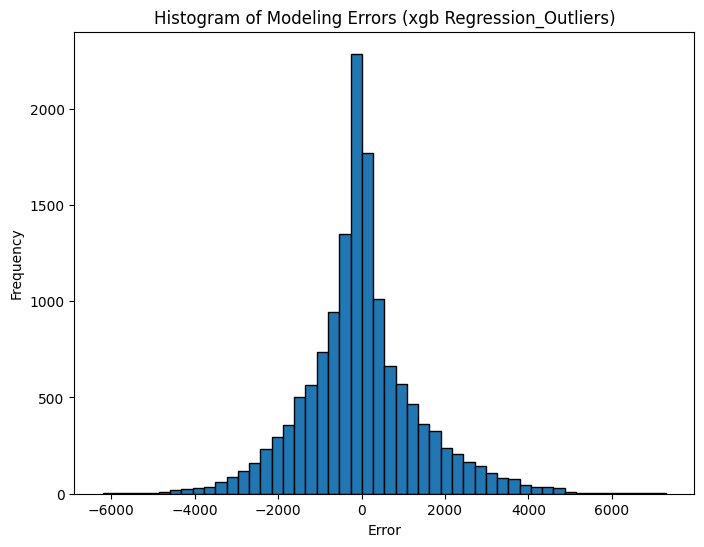

In [119]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_xgb

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (xgb Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# LightGBMRegressor_outlier data

In [120]:
#!pip install lightgbm
from lightgbm import LGBMRegressor

# new model
Outlier_lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# new pipeline
Outlier_lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', Outlier_lgbm_model)])

In [121]:
# Fit the model to the training data
Outlier_lgbm_pipeline.fit(Train_X, Train_Y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 33133, number of used features: 26
[LightGBM] [Info] Start training from score 11338.876286


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model', LGBMRegressor(random_state=42))])

In [122]:
# Make predictions on the training set
Train_Y_pred_lgbm = Outlier_lgbm_pipeline.predict(Train_X)

In [123]:
# Make predictions on the validation set
test_Y_pred_lgbm = Outlier_lgbm_pipeline.predict(test_X)

In [124]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_lgbm_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_lgbm_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1323.9178
            Mean Absolute Error (MAE) : 945.2368
          Mean Percentage Error (MPE) : -2.1590
Mean Absolute Percentage Error (MAPE) : 9.9598

Regression statistics

                      Mean Error (ME) : -20.8609
       Root Mean Squared Error (RMSE) : 1380.8890
            Mean Absolute Error (MAE) : 988.1004
          Mean Percentage Error (MPE) : -2.4376
Mean Absolute Percentage Error (MAPE) : 10.3301


In [125]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_lgbm)
r2 = r2_score(Train_Y, Train_Y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1752758.379944103
R-squared: 0.9619347492028085


In [126]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_lgbm)
r2 = r2_score(test_Y, test_Y_pred_lgbm)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1906854.298791138
R-squared: 0.9584539161034922


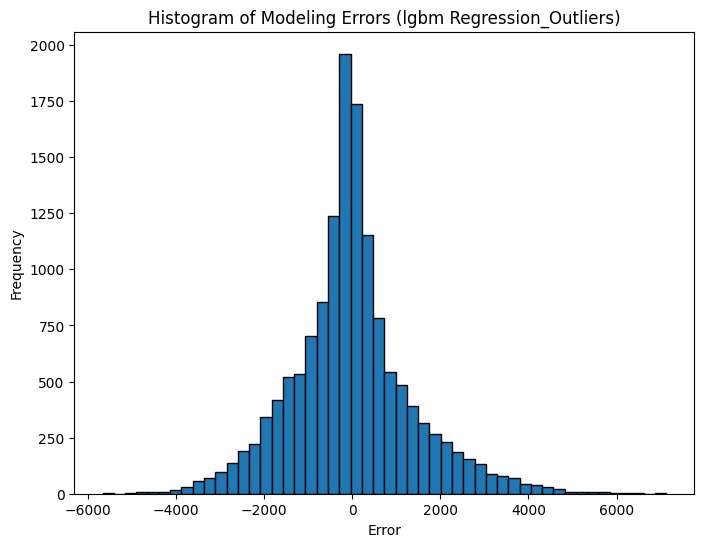

In [127]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_lgbm

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (lgbm Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# knn Regressor_outlier diamonds

In [128]:
#Initialise the model
Outlier_knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune this parameter

Outlier_knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                               ('scaler', StandardScaler()),    # Standardize features
                               ('model', Outlier_knn_model)])

In [129]:
# Fit the model to the training data
Outlier_knn_pipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [130]:
# Make predictions on the training set
Train_Y_pred_knn = Outlier_knn_pipeline.predict(Train_X)

In [131]:
# Make predictions on the validation set
test_Y_pred_knn = Outlier_knn_pipeline.predict(test_X)

In [132]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_knn_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_knn_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : -12.1335
       Root Mean Squared Error (RMSE) : 1068.3664
            Mean Absolute Error (MAE) : 744.3476
          Mean Percentage Error (MPE) : -0.6391
Mean Absolute Percentage Error (MAPE) : 6.6681

Regression statistics

                      Mean Error (ME) : -21.6213
       Root Mean Squared Error (RMSE) : 1214.4487
            Mean Absolute Error (MAE) : 854.4529
          Mean Percentage Error (MPE) : -0.8599
Mean Absolute Percentage Error (MAPE) : 7.6115


In [133]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_knn)
r2 = r2_score(Train_Y, Train_Y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1141406.7972643587
R-squared: 0.9752116797747831


In [134]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_knn)
r2 = r2_score(test_Y, test_Y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1474885.677366197
R-squared: 0.9678655447726342


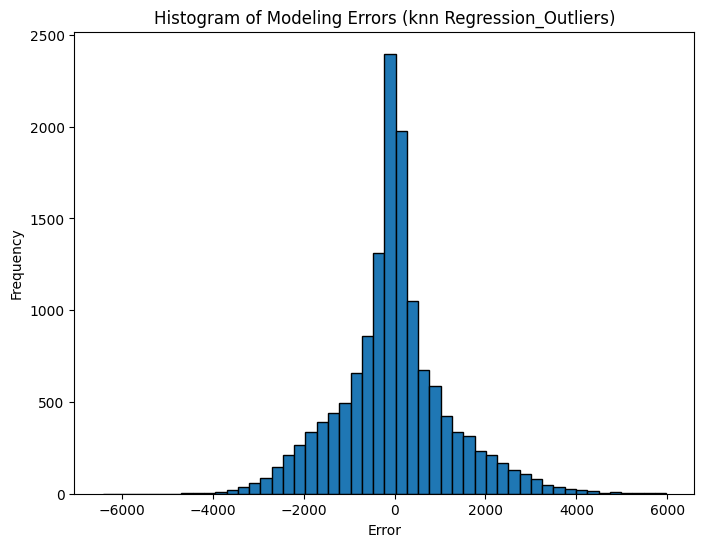

In [135]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_knn

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (knn Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Linear Regression_outlier diamonds

In [136]:
#Initialise the model
Outlier_linear_model = LinearRegression()

Outlier_linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                                  ('scaler', StandardScaler()),    # Standardize features
                                  ('model', Outlier_linear_model)])


In [137]:
# Fit the model to the training data
Outlier_linear_pipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [138]:
# Make predictions on the training set
Train_Y_pred_linreg = Outlier_linear_pipeline.predict(Train_X)

In [139]:
# Make predictions on the validation set
test_Y_pred_linreg = Outlier_linear_pipeline.predict(test_X)

In [140]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_linear_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_linear_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : 0.9406
       Root Mean Squared Error (RMSE) : 2217.3802
            Mean Absolute Error (MAE) : 1708.8648
          Mean Percentage Error (MPE) : 5.2586
Mean Absolute Percentage Error (MAPE) : 36.0992

Regression statistics

                      Mean Error (ME) : -23.7715
       Root Mean Squared Error (RMSE) : 2224.7495
            Mean Absolute Error (MAE) : 1705.3430
          Mean Percentage Error (MPE) : 4.1290
Mean Absolute Percentage Error (MAPE) : 35.0990


In [141]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_linreg)
r2 = r2_score(Train_Y, Train_Y_pred_linreg)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4916775.0917619215
R-squared: 0.8932207204810109


In [142]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_linreg)
r2 = r2_score(test_Y, test_Y_pred_linreg)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4949510.162615893
R-squared: 0.892161260253067


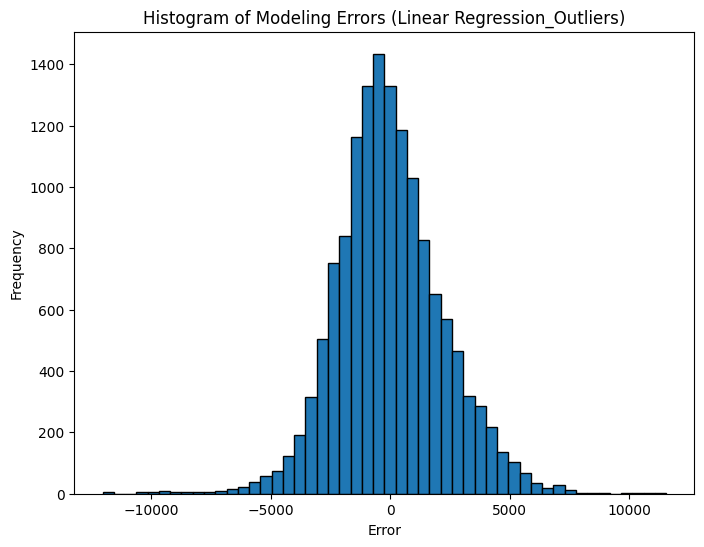

In [143]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_linreg

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Linear Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Decision Tree Regressor_outlier diamonds

In [144]:
#Initialise model
Outlier_decision_tree_model = DecisionTreeRegressor()

Outlier_decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('scaler', StandardScaler()),    # Standardize features if necessary
    ('model', Outlier_decision_tree_model)
])

In [145]:
# Fit the model to the training data
Outlier_decision_tree_pipeline.fit(Train_X, Train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'length_mm', 'width_mm',
                                                   'height_mm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('scaler', StandardScaler()),
                ('model', DecisionTreeRegressor())])

In [146]:
# Make predictions on the training set
Train_Y_pred_DT = Outlier_decision_tree_pipeline.predict(Train_X)

In [147]:
# Make predictions on the validation set
test_Y_pred_DT = Outlier_decision_tree_pipeline.predict(test_X)

In [148]:
# Evaluate the model #regression tree performance
regressionSummary(Train_Y, Outlier_decision_tree_pipeline.predict(Train_X))
regressionSummary(test_Y, Outlier_decision_tree_pipeline.predict(test_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1011.5499
            Mean Absolute Error (MAE) : 707.8960
          Mean Percentage Error (MPE) : -0.5971
Mean Absolute Percentage Error (MAPE) : 6.3675

Regression statistics

                      Mean Error (ME) : -12.9037
       Root Mean Squared Error (RMSE) : 1171.9920
            Mean Absolute Error (MAE) : 827.5442
          Mean Percentage Error (MPE) : -0.8151
Mean Absolute Percentage Error (MAPE) : 7.3846


In [149]:
#Calculate mean squared error, training
mse = mean_squared_error(Train_Y, Train_Y_pred_DT)
r2 = r2_score(Train_Y, Train_Y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1023233.1286123574
R-squared: 0.9777780975915993


In [150]:
#Calculate mean squared error, validation
mse = mean_squared_error(test_Y, test_Y_pred_DT)
r2 = r2_score(test_Y, test_Y_pred_DT)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1373565.167997816
R-squared: 0.9700730917180533


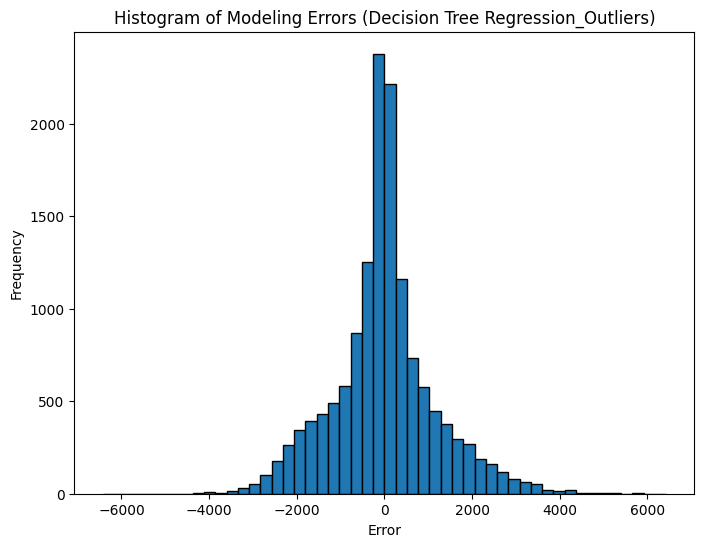

In [151]:
# Calculate modeling errors
errors = test_Y - test_Y_pred_DT

# Plot histogram of errors
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.title('Histogram of Modeling Errors (Decision Tree Regression_Outliers)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Prediction using outlier trained models

In [152]:
new_data = "/content/drive/MyDrive/hackdiversity/cleaned_diamond_data.csv"

Out_df2024 = pd.read_csv(new_data)
Out_df2024

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,1,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,2012
1,2,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63,2012
2,3,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75,2012
3,4,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48,2012
4,5,0.24,Very Good,I,VVS1,62.30,57.00,336,3.95,3.98,2.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.80,57.00,3394,5.75,5.76,3.50,2023
403045,33936,0.72,Good,D,SI1,63.10,55.00,3256,5.69,5.75,3.61,2023
403046,33937,0.70,Very Good,D,SI1,62.80,60.00,3569,5.66,5.68,3.56,2023
403047,33938,0.86,Premium,H,SI2,61.00,58.00,4022,6.15,6.12,3.74,2023


In [153]:
Out_df2024 = Out_df2024.rename(columns={'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
Out_df2024

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,year
0,1,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,2012
1,2,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63,2012
2,3,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75,2012
3,4,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48,2012
4,5,0.24,Very Good,I,VVS1,62.30,57.00,336,3.95,3.98,2.47,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.80,57.00,3394,5.75,5.76,3.50,2023
403045,33936,0.72,Good,D,SI1,63.10,55.00,3256,5.69,5.75,3.61,2023
403046,33937,0.70,Very Good,D,SI1,62.80,60.00,3569,5.66,5.68,3.56,2023
403047,33938,0.86,Premium,H,SI2,61.00,58.00,4022,6.15,6.12,3.74,2023


# Outlier Diamonds Prediction on the new dataset

In [154]:
# Use the trained Random Forest pipeline to predict prices on the new dataset
Outlier_RFpredicted_prices = Outlier_RFpipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_RF'] = Outlier_RFpredicted_prices

In [155]:
# Use the trained xgb pipeline to predict prices on the new dataset
Outlier_XGBpredicted_prices = Outlier_xgb_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_XGB'] = Outlier_XGBpredicted_prices

In [156]:
# Use the trained xgb pipeline to predict prices on the new dataset
Outlier_lgbmpredicted_prices =Outlier_lgbm_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_LGBM'] = Outlier_lgbmpredicted_prices

In [157]:
# Use the trained knn pipeline to predict prices on the new dataset
Outlier_knnpredicted_prices = Outlier_knn_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_KNN'] = Outlier_knnpredicted_prices

In [158]:
# Use the trained pipeline to predict prices on the new dataset
Outlier_linearpredicted_prices = Outlier_linear_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_Lin'] = Outlier_linearpredicted_prices

In [159]:
# Use the trained pipeline to predict prices on the new dataset
Outlier_DecisionTreepredicted_prices = Outlier_decision_tree_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
Out_df2024['Out_pred_cost_DT'] = Outlier_DecisionTreepredicted_prices

In [160]:
# Average predicted cost
Out_df2024['Out_pred_cost_avg'] = Out_df2024[['Out_pred_cost_RF', 'Out_pred_cost_XGB', 'Out_pred_cost_LGBM', 'Out_pred_cost_KNN', 'Out_pred_cost_DT']].mean(axis=1)
# Cost range (max - min)
Out_df2024['Out_pred_cost_range_min'] = Out_df2024[['Out_pred_cost_RF', 'Out_pred_cost_XGB', 'Out_pred_cost_LGBM', 'Out_pred_cost_KNN', 'Out_pred_cost_DT']].min(axis=1)
Out_df2024['Out_pred_cost_range_max'] = Out_df2024[['Out_pred_cost_RF', 'Out_pred_cost_XGB', 'Out_pred_cost_LGBM', 'Out_pred_cost_KNN', 'Out_pred_cost_DT']].max(axis=1)

Out_df2024

,index,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,...,year,Out_pred_cost_RF,Out_pred_cost_XGB,Out_pred_cost_LGBM,Out_pred_cost_KNN,Out_pred_cost_Lin,Out_pred_cost_DT,Out_pred_cost_avg,Out_pred_cost_range_min,Out_pred_cost_range_max
0,1,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,...,2012,358.39,490.86,608.42,352.80,-2232.00,357.78,433.65,352.80,608.42
1,2,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,...,2012,573.03,262.44,710.03,1316.00,-1657.93,534.12,679.13,262.44,1316.00
2,3,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,...,2012,836.97,368.63,614.10,2099.80,-7277.34,1019.80,987.86,368.63,2099.80
3,4,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,...,2012,546.58,37.42,719.24,429.80,-3153.11,547.20,456.05,37.42,719.24
4,5,0.24,Very Good,I,VVS1,62.30,57.00,336,3.95,3.98,...,2012,563.13,400.48,653.65,678.80,-526.17,542.83,567.78,400.48,678.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403044,33935,0.72,Ideal,D,SI1,60.80,57.00,3394,5.75,5.76,...,2023,2709.44,2773.49,2804.24,14687.00,6418.57,2593.00,5113.43,2593.00,14687.00
403045,33936,0.72,Good,D,SI1,63.10,55.00,3256,5.69,5.75,...,2023,2621.46,2752.43,2787.40,5385.60,4570.07,3252.44,3359.87,2621.46,5385.60
403046,33937,0.70,Very Good,D,SI1,62.80,60.00,3569,5.66,5.68,...,2023,2731.68,2668.30,2772.94,3645.20,5673.80,2400.22,2843.67,2400.22,3645.20
403047,33938,0.86,Premium,H,SI2,61.00,58.00,4022,6.15,6.12,...,2023,2736.45,2644.41,2670.86,2158.80,3946.22,2662.00,2574.50,2158.80,2736.45


In [161]:
#What will be the total sales in 2024?
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Out_total_sales_RF = Out_df2024['Out_pred_cost_RF'].sum()
Out_total_sales_XGB = Out_df2024['Out_pred_cost_XGB'].sum()
Out_total_sales_LGBM = Out_df2024['Out_pred_cost_LGBM'].sum()
Out_total_sales_KNN = Out_df2024['Out_pred_cost_KNN'].sum()
Out_total_sales_LinReg = Out_df2024['Out_pred_cost_Lin'].sum()
Out_total_sales_DT = Out_df2024['Out_pred_cost_DT'].sum()


print(f'Out_Total sales_RF: {Out_total_sales_RF}')
print(f'Out_Total sales_XGB: {Out_total_sales_XGB}')
print(f'Out_Total sales_LGBM: {Out_total_sales_LGBM}')
print(f'Out_Total sales_KNN: {Out_total_sales_KNN}')
print(f'Out_Total sales_LinReg: {Out_total_sales_LinReg}')
print(f'Out_Total sales_DT: {Out_total_sales_DT}')

Out_Total sales_RF: 2008303473.1016784
Out_Total sales_XGB: 2001206016.0
Out_Total sales_LGBM: 1990538286.3860884
Out_Total sales_KNN: 3112696711.5999994
Out_Total sales_LinReg: 2439739000.8495264
Out_Total sales_DT: 1965210281.329756


In [162]:
#What is the average predicted diamond sale in 2024?
Out_average_price_RF = Out_df2024['Out_pred_cost_RF'].mean()
Out_average_price_XGB = Out_df2024['Out_pred_cost_XGB'].mean()
Out_average_price_LGBM = Out_df2024['Out_pred_cost_LGBM'].mean()
Out_average_price_KNN = Out_df2024['Out_pred_cost_KNN'].mean()
Out_average_price_LinReg = Out_df2024['Out_pred_cost_Lin'].mean()
Out_average_price_DT = Out_df2024['Out_pred_cost_DT'].mean()

print(f"Out_RF_Average predicted diamond sale price in 2024: {Out_average_price_RF}")
print(f"Out_XGB_Average predicted diamond sale price in 2024: {Out_average_price_XGB}")
print(f"Out_LGBM_Average predicted diamond sale price in 2024: {Out_average_price_LGBM}")
print(f"Out_KNN_Average predicted diamond sale price in 2024: {Out_average_price_KNN}")
print(f"Out_LinReg_Average predicted diamond sale price in 2024: {Out_average_price_LinReg}")
print(f"Out_DT_Average predicted diamond sale price in 2024: {Out_average_price_DT}")

Out_RF_Average predicted diamond sale price in 2024: 4982.7774615535045
Out_XGB_Average predicted diamond sale price in 2024: 4965.16796875
Out_LGBM_Average predicted diamond sale price in 2024: 4938.7004716202955
Out_KNN_Average predicted diamond sale price in 2024: 7722.874170634338
Out_LinReg_Average predicted diamond sale price in 2024: 6053.206932282493
Out_DT_Average predicted diamond sale price in 2024: 4875.859464555813


In [163]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Set display options to suppress scientific notation
Out_total_sales_per_cut = Out_df2024.groupby('cut')[['Out_pred_cost_RF', 'Out_pred_cost_XGB', 'Out_pred_cost_LGBM', 'Out_pred_cost_KNN', 'Out_pred_cost_Lin', 'Out_pred_cost_DT']].sum()
print(Out_total_sales_per_cut)

           Out_pred_cost_RF  Out_pred_cost_XGB  Out_pred_cost_LGBM  \
cut                                                                  
Fair            57742260.53        57241680.00         57261056.77   
Good           169412108.12       168227056.00        169631332.94   
Ideal          779748569.70       754532160.00        739524199.01   
Premium        569153242.60       582053696.00        582258730.34   
Very Good      432247292.16       439151296.00        441862967.31   

           Out_pred_cost_KNN  Out_pred_cost_Lin  Out_pred_cost_DT  
cut                                                                
Fair             57297426.00        56599888.53       57836561.56  
Good            189906086.80       169783474.55      166684819.88  
Ideal          1631015844.20       993796103.48      757689783.10  
Premium         652658226.20       670039343.52      557959154.85  
Very Good       581819128.40       549520190.76      425039961.95  


# Combined prediction

In [164]:
RF_combined_prediction = (Out_df2024['Out_pred_cost_RF']+df2024['pred_cost_RF'])/2

In [165]:
knn_combined_prediction = (Out_df2024['Out_pred_cost_KNN']+df2024['pred_cost_KNN'])/2

In [166]:
xgb_combined_prediction = (Out_df2024['Out_pred_cost_XGB']+df2024['pred_cost_XGB'])/2

In [167]:
lgbm_combined_prediction = (Out_df2024['Out_pred_cost_LGBM']+df2024['pred_cost_LGBM'])/2

In [168]:
Linreg_combined_prediction = (Out_df2024['Out_pred_cost_Lin']+df2024['pred_cost_Lin'])/2

In [169]:
DT_combined_prediction = (Out_df2024['Out_pred_cost_DT']+df2024['pred_cost_DT'])/2

In [175]:
df2024['RF_combined_prediction'] = RF_combined_prediction
df2024['knn_combined_prediction'] = knn_combined_prediction
df2024['xgb_combined_prediction'] = xgb_combined_prediction
df2024['lgbm_combined_prediction'] = lgbm_combined_prediction
df2024['Linreg_combined_prediction'] = Linreg_combined_prediction
df2024['DT_combined_prediction'] = DT_combined_prediction

In [176]:
df2024

,carat,cut,color,clarity,depth,table,cost_dollars,length_mm,width_mm,height_mm,...,pred_cost_DT,pred_cost_avg,pred_cost_range_min,pred_cost_range_max,RF_combined_prediction,knn_combined_prediction,xgb_combined_prediction,lgbm_combined_prediction,Linreg_combined_prediction,DT_combined_prediction
0,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,...,418.75,517.79,418.75,667.20,413.35,510.00,502.66,564.32,-949.73,388.26
1,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63,...,383.89,410.17,382.89,494.42,477.96,851.30,332.75,602.23,-1062.85,459.01
2,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75,...,386.22,387.61,375.59,400.00,611.27,1249.90,372.11,502.38,-4973.57,703.01
3,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48,...,382.67,377.64,356.02,393.56,464.08,402.10,196.72,556.40,-2004.76,464.93
4,0.24,Very Good,I,VVS1,62.30,57.00,336,3.95,3.98,2.47,...,391.38,421.20,383.80,503.35,477.06,531.30,418.48,578.50,-336.49,467.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403044,0.72,Ideal,D,SI1,60.80,57.00,3394,5.75,5.76,3.50,...,3003.50,3092.44,3003.50,3244.63,2860.62,8852.00,3009.06,2994.75,5026.50,2798.25
403045,0.72,Good,D,SI1,63.10,55.00,3256,5.69,5.75,3.61,...,3151.43,3156.49,3128.61,3202.00,2885.84,4293.80,2940.52,2968.81,4009.36,3201.94
403046,0.70,Very Good,D,SI1,62.80,60.00,3569,5.66,5.68,3.56,...,3084.73,3107.63,3011.69,3292.60,2918.11,3468.90,2856.45,2892.31,4433.21,2742.47
403047,0.86,Premium,H,SI2,61.00,58.00,4022,6.15,6.12,3.74,...,3240.88,3166.77,2885.04,3308.20,2995.38,2733.50,2764.72,2908.14,3517.25,2951.44
